In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
df=pd.read_csv('Data.csv')

In [5]:
df.head(20)#展示前20行

,Country,Continent,Life_expectancy,GDP_per_capita,Population
0,Algeria,Africa,75.042537,4132.760292,39871528.0
1,Angola,Africa,52.666098,3695.793748,27859305.0
2,Benin,Africa,59.720707,783.947091,10575952.0
3,Botswana,Africa,64.487415,6532.060501,2209197.0
4,Burundi,Africa,57.107049,303.681022,10199270.0
5,Cameroon,Africa,55.934390,1244.429421,22834522.0
6,Central African Republic,Africa,51.419122,348.381417,4546100.0
7,Chad,Africa,51.873317,777.248705,14009413.0
8,Comoros,Africa,63.554024,727.646387,777424.0
9,Congo,Africa,62.867659,1712.121131,4995648.0


In [6]:
df.dropna() #删去缺失值

,Country,Continent,Life_expectancy,GDP_per_capita,Population
0,Algeria,Africa,75.042537,4132.760292,39871528.0
1,Angola,Africa,52.666098,3695.793748,27859305.0
2,Benin,Africa,59.720707,783.947091,10575952.0
3,Botswana,Africa,64.487415,6532.060501,2209197.0
4,Burundi,Africa,57.107049,303.681022,10199270.0
...,...,...,...,...,...
171,Guyana,South America,66.507512,4136.689919,768514.0
172,Paraguay,South America,73.025634,4109.367724,6639119.0
173,Peru,South America,74.780732,6030.343259,31376671.0
174,Suriname,South America,71.294171,8818.982566,553208.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
Country            177 non-null object
Continent          177 non-null object
Life_expectancy    169 non-null float64
GDP_per_capita     169 non-null float64
Population         176 non-null float64
dtypes: float64(3), object(2)
memory usage: 7.0+ KB


In [8]:
#对列重新命名
df.columns = ['country','continent','life', 'GDP','population']
matplotlib.rcParams['font.family']='SimHei'

In [9]:
df.head()

,country,continent,life,GDP,population
0,Algeria,Africa,75.042537,4132.760292,39871528.0
1,Angola,Africa,52.666098,3695.793748,27859305.0
2,Benin,Africa,59.720707,783.947091,10575952.0
3,Botswana,Africa,64.487415,6532.060501,2209197.0
4,Burundi,Africa,57.107049,303.681022,10199270.0


In [10]:
df.GDP

0       4132.760292
1       3695.793748
2        783.947091
3       6532.060501
4        303.681022
           ...     
172     4109.367724
173     6030.343259
174     8818.982566
175    15524.842470
176             NaN
Name: GDP, Length: 177, dtype: float64

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


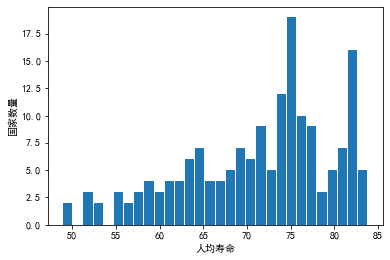

In [11]:
#绘制人均寿命的直方图
plt.hist(df.life, bins=30, rwidth=0.9)  # bins 设置直方图数量，rwidth设置柱子宽度
plt.xlabel('人均寿命')
plt.ylabel('国家数量')
plt.show() 

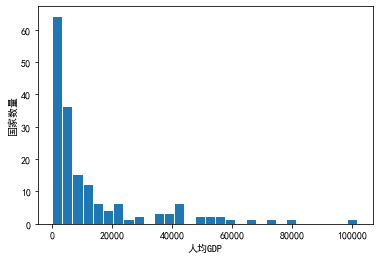

In [12]:
plt.hist(df.GDP,bins=30,rwidth=0.9)
plt.xlabel('人均GDP')
plt.ylabel('国家数量')
plt.show()

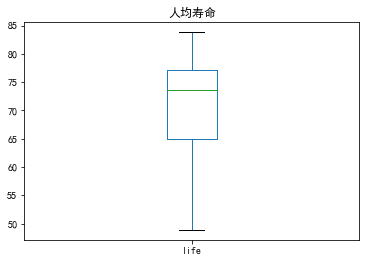

In [13]:
#人均寿命箱线图
df.life.plot.box(title='人均寿命')
plt.show()

In [14]:
a=df['continent'].value_counts()#每个州出现多少次
a

Africa           50
Europe           45
Asia             36
North America    20
Oceania          14
South America    12
Name: continent, dtype: int64

In [15]:
continent=list(df['continent'].unique())
continent

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [16]:
x=np.arange(len(continent))
x

array([0, 1, 2, 3, 4, 5])

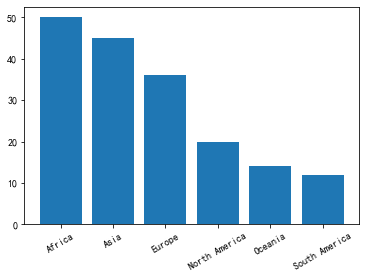

In [17]:
plt.bar(x, a)
plt.xticks(x, continent,rotation=30)
plt.show()

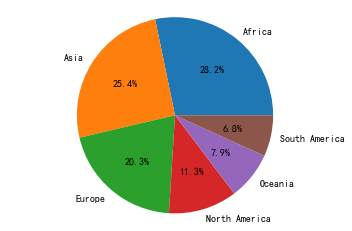

In [18]:
plt.pie(a, labels=continent, autopct='%1.1f%%')  # autopct 显示占比
plt.axis('equal')  # 调整坐标轴的比例
plt.show()

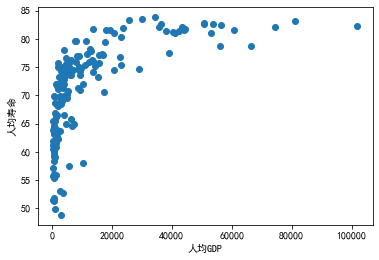

In [19]:
plt.scatter(df.GDP, df.life)
plt.xlabel('人均GDP')
plt.ylabel('人均寿命')
plt.show()

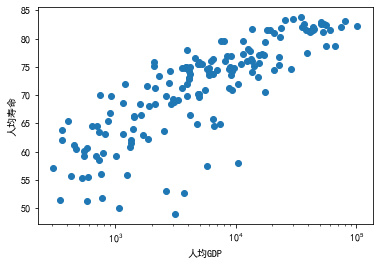

In [21]:
plt.scatter(df.GDP, df.life)
plt.xlabel('人均GDP')
plt.ylabel('人均寿命')
plt.xscale('log')
plt.show()

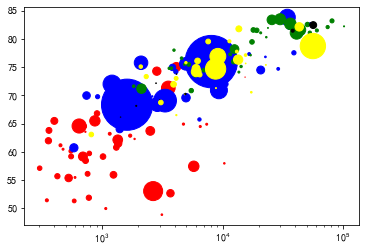

In [25]:
#人均GDP与人均寿命的气泡图（数据点大小，正比于人口数，给不同洲的国家设置不同的颜色）
#x：x轴上的数值y：y轴上的数值s：散点标记的大小c：散点标记的颜色
map_dict = {      
    'Asia':'blue',
    'Europe':'green',
    'Africa':'red',
    'North America':'yellow',
    'South America':'yellow',
    'Oceania':'black'
}
colors = df.continent.map(map_dict)  
size = df.population / 1e6 * 2
plt.scatter(df.GDP, df.life, c=colors,s=size, marker="o")
plt.xscale('log')
plt.show()

In [4]:
import numpy as np
import scipy as sp
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

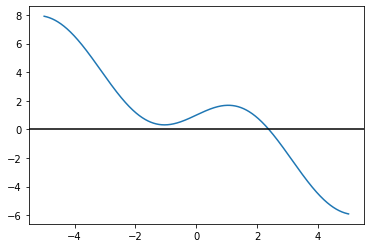

In [5]:
f=lambda x: np.sin(x)*2 - x + 1
x = np.linspace(-5, 5, 1000) # 先生成 1000 个 x
y = f(x)  # 对应生成 1000 个 f(x)
plt.plot(x, y); # 看一下这个函数长什么样子
plt.axhline(0, color='k'); # 画一根横线，位置在 y=0

In [6]:
optimize.newton(lambda x: 2*np.sin(x) - x + 1, -3.3)

2.3800612731393396

In [7]:
optimize.brentq(lambda x: 2*np.sin(x) - x + 1, -3, 3)

2.380061273139339

In [ ]:
#3X1+2X2=3;
#X1-2X2=5B

In [12]:
import numpy as np
from scipy import linalg as la
A = np.array([[3, 2], [1, -2]])
b = np.array([3, 5])

In [13]:
np.linalg.cond(A)

1.640388203202208

In [14]:
np.linalg.norm(A)

4.242640687119285

In [15]:
P, L, U = la.lu(A)
la.solve(A, b)

array([ 2. , -1.5])